# Task 1:- Fraud Detection

### Aim - Detect fraudulent transactions in a credit card dataset.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Analysis

In [3]:
data.info()                              #Displays Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.head()         #Displays CREDIT CARD Information upto 4 entries 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Exploration

In [5]:
data.shape   #Define shape of Dataset

(284807, 31)

In [6]:
data.isnull().sum()  #Check the number of missing values in each Column

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.columns   #Define Columns in Dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.tail(6)   #Gives Information for Last 6 entries

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
data.describe()   #Describes the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().values.any()

False

In [12]:
fraud = data[data['Class']==1]         #Get the Fraud and the normal dataset 

normal = data[data['Class']==0]

In [13]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Data Visualization

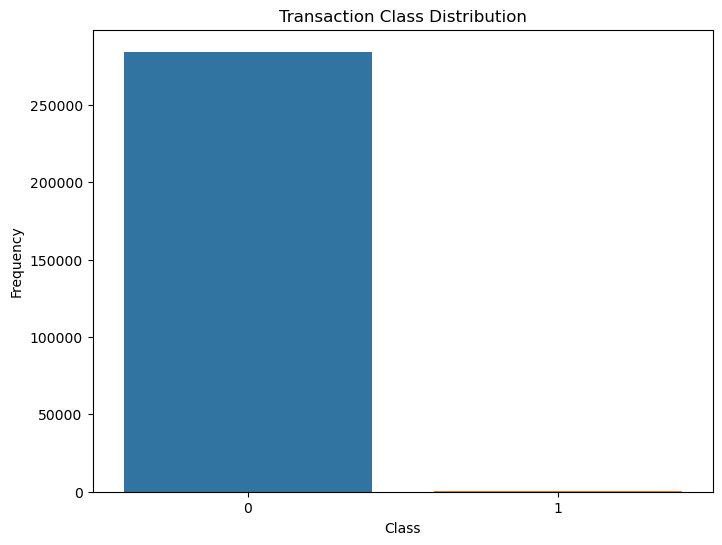

In [16]:
count_classes = data['Class'].value_counts()          # Plot the class distribution using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [17]:
fraudulent_transactions = data[data['Class'] == 1]
non_fraudulent_transactions = data[data['Class'] == 0]


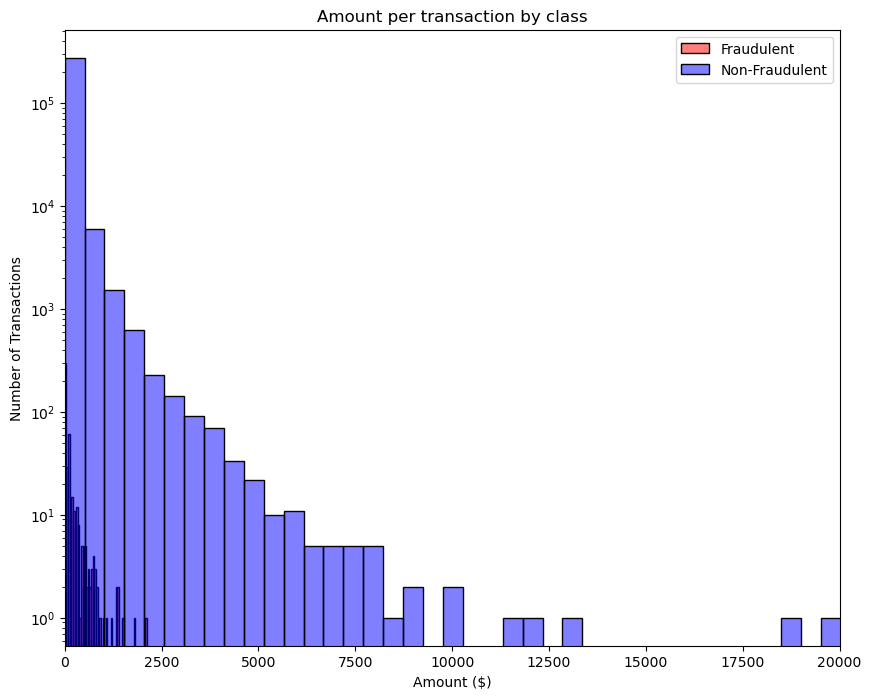

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(data=fraudulent_transactions, x='Amount', bins=50, color='red', alpha=0.5, label='Fraudulent')
sns.histplot(data=non_fraudulent_transactions, x='Amount', bins=50, color='blue', alpha=0.5, label='Non-Fraudulent')
plt.title('Amount per transaction by class')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.legend()
plt.show()

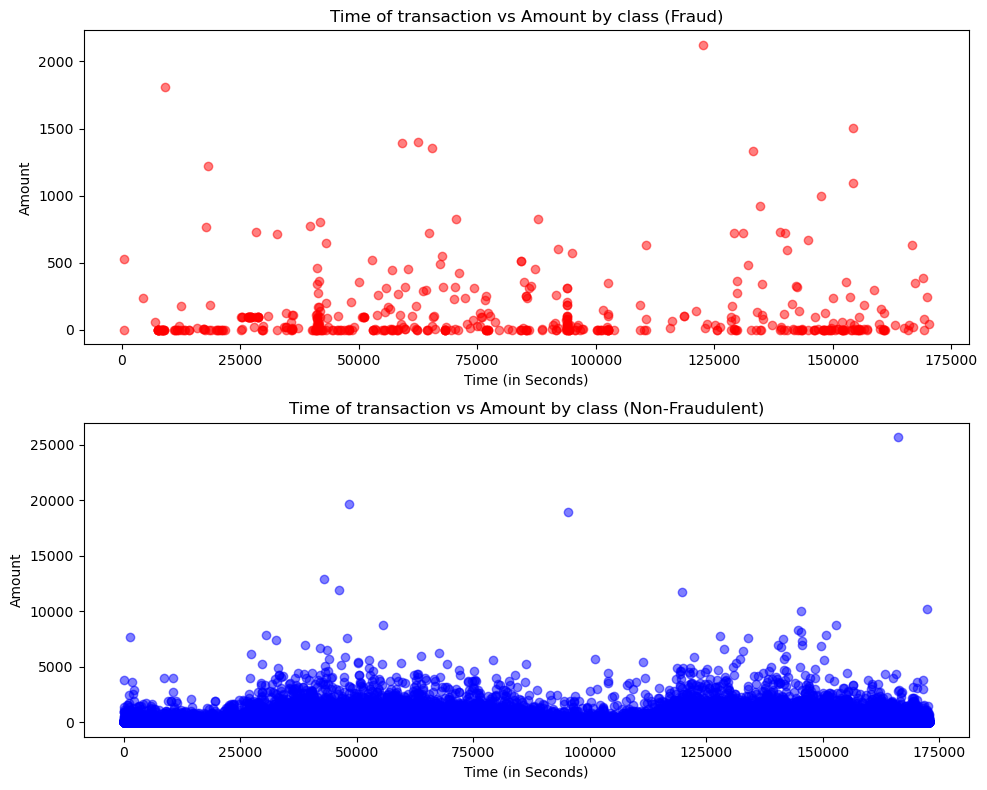

In [19]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.scatter(fraudulent_transactions['Time'], fraudulent_transactions['Amount'], color='red', alpha=0.5)
plt.title('Time of transaction vs Amount by class (Fraud)')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.subplot(2, 1, 2)
plt.scatter(non_fraudulent_transactions['Time'], non_fraudulent_transactions['Amount'], color='blue', alpha=0.5)
plt.title('Time of transaction vs Amount by class (Non-Fraudulent)')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

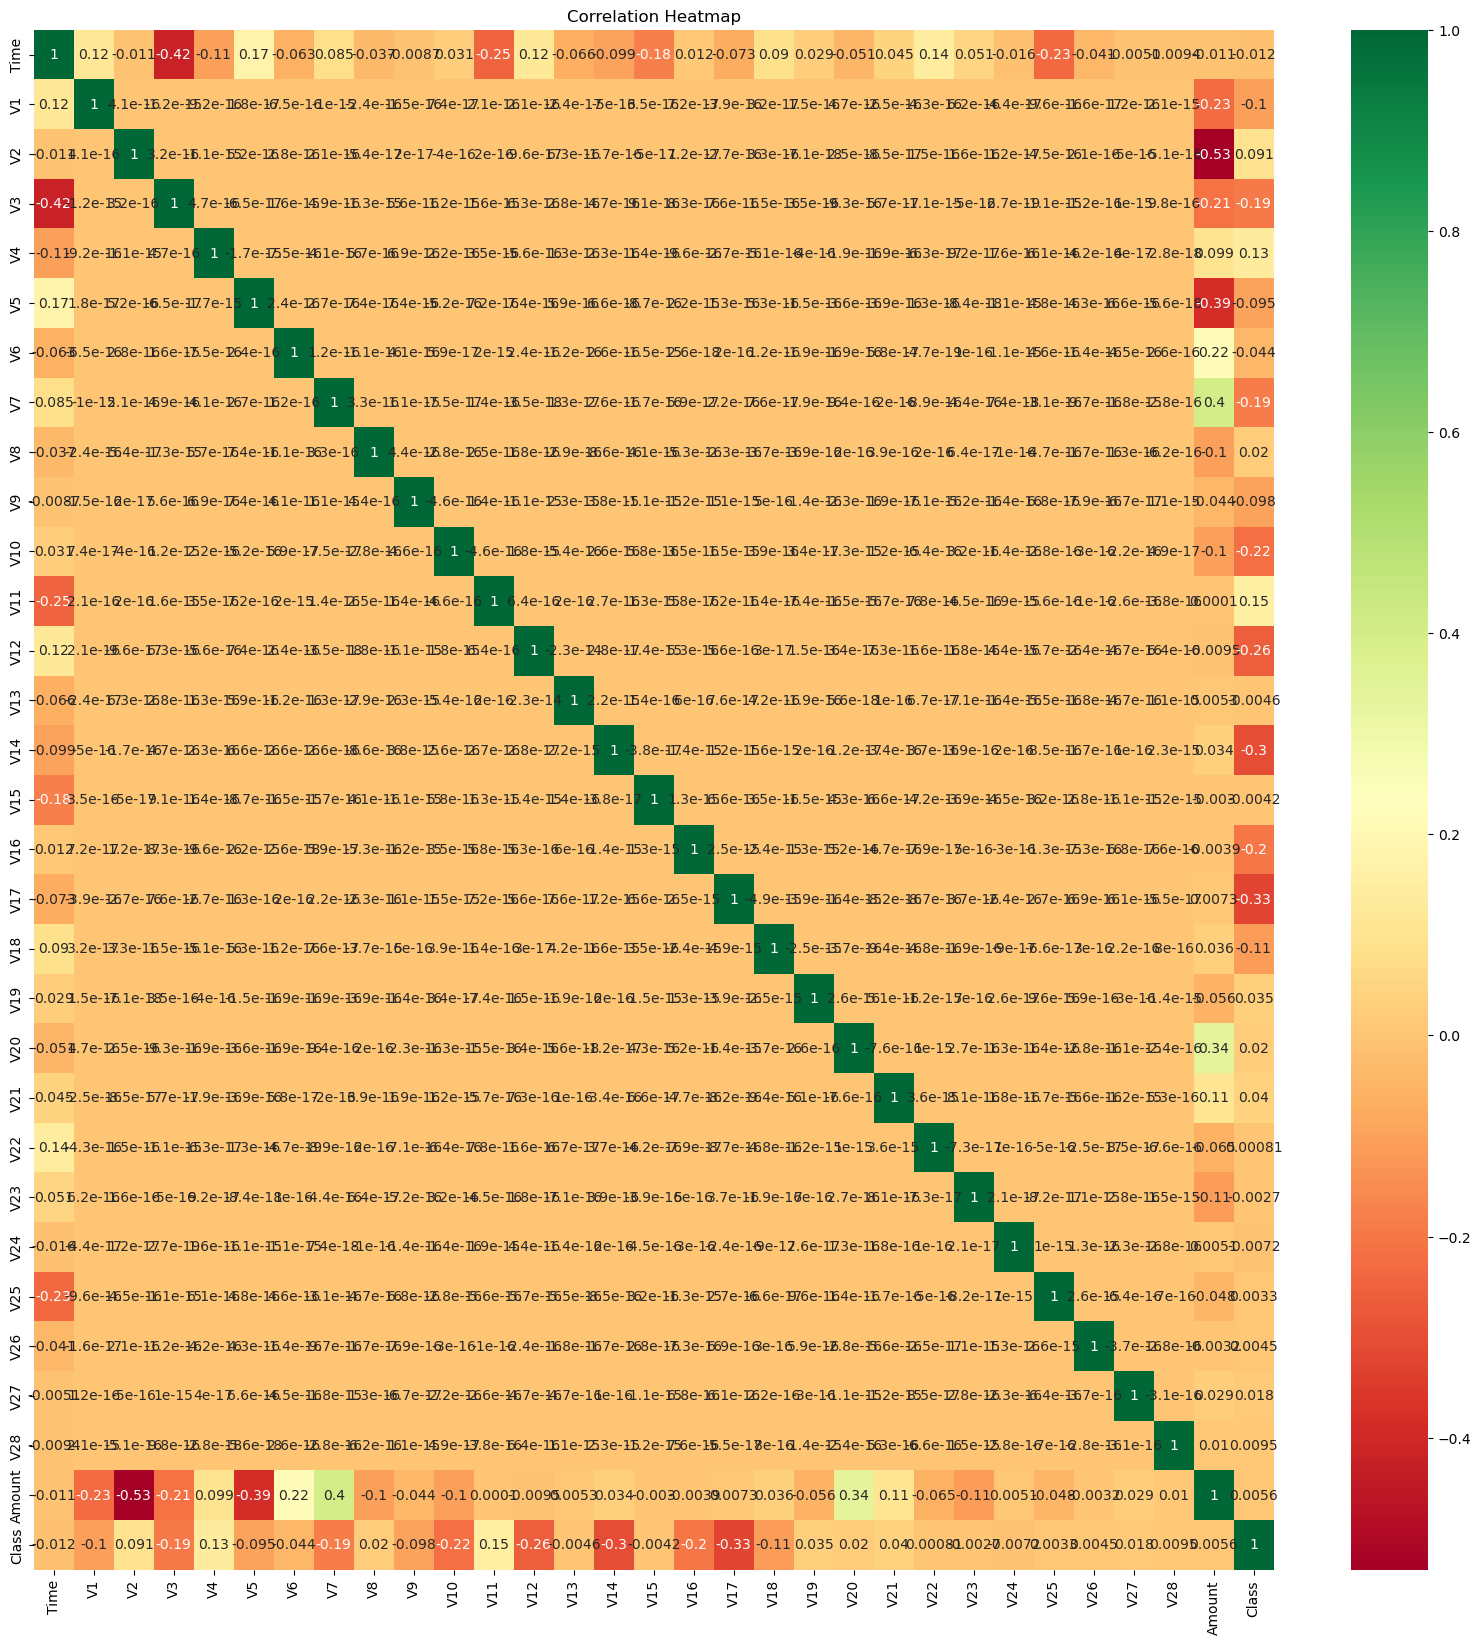

In [20]:
corrmat = data.corr()
top_corr_features = corrmat.index

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap')
plt.show()

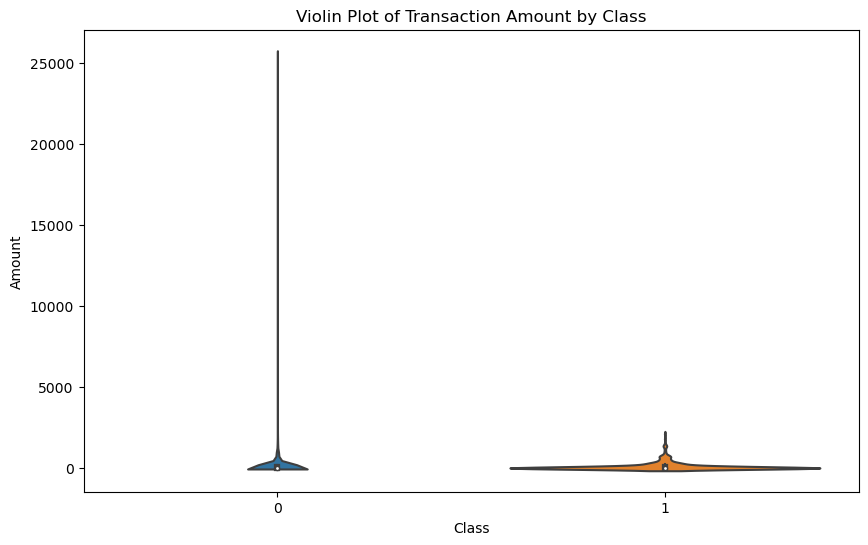

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=data)
plt.title('Violin Plot of Transaction Amount by Class')
plt.show()


### Model Prediction

In [21]:
Fraud = data[data['Class']==1]

Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))


In [22]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


In [23]:
columns = data.columns.tolist()                       # Create independent and dependent features
columns = [c for c in columns if c != "Class"]        # Filter the columns to remove data we do not want 
target = "Class"                                      # Store the variable we are predicting 

state = np.random.RandomState(42)                     # Define a random state 

X = data[columns]                                     # Independent features (X) and dependent feature (Y)
Y = data[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))  # Generating outliers for demonstration purposes

print("Shape of X:", X.shape)                         # Print the shapes of X & Y
print("Shape of Y:", Y.shape)


Shape of X: (284807, 30)
Shape of Y: (284807,)


In [24]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

outlier_fraction = 0.01                               # Define outlier fraction (adjust as per your dataset)

classifiers = {                                       # Define classifiers
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X), 
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, 
                                          max_iter=-1)
}

In [25]:
type(classifiers)

dict

In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Reduce the dataset size for initial testing
data_sample = data.sample(frac=0.1, random_state=42)

# Separate features and target variable
X_sample = data_sample.drop('Class', axis=1)
y_sample = data_sample['Class']

n_outliers = len(fraudulent_transactions)

for clf_name, clf in classifiers.items():
    # Fit the data and tag outliers
    if clf_name == "Isolation Forest":
        clf.set_params(max_samples=len(X_sample))  # Set max_samples equal to the number of samples
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_sample)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_sample)
        y_pred = clf.predict(X_sample)
    else:
        clf.fit(X_sample)
        scores_prediction = clf.decision_function(X_sample)
        y_pred = clf.predict(X_sample)
    
    # Reshape the prediction values to 0 for valid transactions, 1 for fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    # Calculate number of errors
    n_errors = (y_pred != y_sample).sum()
    
    # Run Classification Metrics
    print(f"{clf_name}: {n_errors}")
    print("Accuracy Score:")
    print(accuracy_score(y_sample, y_pred))
    print("Classification Report:")
    print(classification_report(y_sample, y_pred))


Isolation Forest: 267
Accuracy Score:
0.990625329166813
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28435
           1       0.11      0.70      0.19        46

    accuracy                           0.99     28481
   macro avg       0.56      0.84      0.59     28481
weighted avg       1.00      0.99      0.99     28481

Local Outlier Factor: 327
Accuracy Score:
0.9885186615638496
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28435
           1       0.01      0.04      0.01        46

    accuracy                           0.99     28481
   macro avg       0.50      0.52      0.50     28481
weighted avg       1.00      0.99      0.99     28481

Support Vector Machine: 9526
Accuracy Score:
0.6655314069028475
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.

### Conclusion

In conclusion, detecting fraudulent transactions in a credit card dataset is a critical endeavor aimed at safeguarding financial systems and consumer interests. Leveraging diverse machine learning and data analytics techniques such as anomaly detection algorithms and supervised learning models, alongside considerations of data quality, feature engineering, and model performance evaluation, facilitates the identification of suspicious patterns within the dataset. The integration of real-time monitoring systems further fortifies fraud detection capabilities, enabling prompt action against fraudulent activities. Successful detection not only minimizes financial losses for institutions and consumers but also fosters trust in the credit card system while enhancing overall security measures. Continuous refinement and adaptation of fraud detection methodologies remain imperative to effectively combat evolving fraud tactics and patterns, ensuring sustained efficacy in fraud prevention efforts.